# Week 7 exercise: Data visualization for NETCDF

Questions?
contact: pengfei.liu@eas.gatech.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs

# if you get errors to import these packages , you will need to install them in Anaconda
# in anaconda command prompt (windows) or terminal (mac/linux) 
# Activate your environment, then type:
# conda install cartopy netcdf4 xarray xlrd 

In [2]:
## load Atlanta temperature data
# load excel data as pandas dataframe
df=pd.read_excel("https://o2.eas.gatech.edu/data/ATL_MonMeanTemp_1879_2020.xls",skiprows=1)
data=df.to_numpy()
TMP_ATL_month=data[:,1:]
TMP_ATL_year=np.nanmean(TMP_ATL_month,1)
# unit conversion deg F ->deg C
TMP_ATL_year_degC=(TMP_ATL_year-32)*(5/9)
year=df.Year.to_numpy()
TMP_ATL_year_degC

array([16.53240741, 16.83333333, 16.86574074, 16.84259259, 16.6712963 ,
       16.2037037 , 14.96759259, 15.24537037, 16.14351852, 16.1712963 ,
       16.15740741, 17.07407407, 15.90277778, 15.35185185, 15.96296296,
       16.44907407, 15.40740741, 16.77777778, 16.54166667, 16.33796296,
       16.47222222, 16.58796296, 15.23611111, 16.18055556, 15.60185185,
       15.6712963 , 15.86574074, 16.18055556, 16.51851852, 16.49074074,
       16.33796296, 15.87037037, 17.10648148, 15.62962963, 16.63888889,
       16.14351852, 16.30092593, 16.3287037 , 15.31018519, 16.52314815,
       16.7962963 , 15.58333333, 17.51851852, 16.98611111, 16.375     ,
       15.65740741, 17.4537037 , 16.14351852, 17.33333333, 15.94907407,
       16.31481481, 16.39814815, 17.21296296, 16.81018519, 17.33796296,
       16.25462963, 16.55555556, 16.79166667, 16.37037037, 17.25462963,
       17.11111111, 15.39351852, 16.97222222, 16.41203704, 16.76388889,
       16.68981481, 16.88425926, 17.12037037, 16.00462963, 16.88

## Mini project #1: handling high dimensional NETCDF data

In [3]:
# Download the most recent NCEP renalysis monthly data from the link below:
# https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.surface.html
# read NCEP reanalysis monthly data (in netcdf format)
# if you get an error in this step, most likely the netcdf4 package is missing in your environment
# to install netcdf4 package, type "conda install netcdf4" in command line
ds=xr.open_dataset('./air.mon.mean.nc')
# show a summary of the dataset
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 883)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-07-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [7]:
# extract surface air temperature data for 1948 to 2020
TMP_NCEP=ds.air.sel(time=slice("1948-01-01","2020-12-01"))
# Atlanta lat lon
# 33.7490° N, 84.3880° W
# note that the longitude range in NCEP data is 0 - 360 deg

# select data for the grid cell where Atlanta located
TMP_ATL_NCEP=TMP_NCEP.sel(lat=33.7490,lon=360-84.3880,method="nearest")
# calculate annual mean temperature for Atlanta
TMP_ATL_NCEP_year=TMP_ATL_NCEP.groupby('time.year').mean('time')

# Here are more examples of selecting data using xarray

# Select Aug data for every year
TMP_NCEP_AUG=TMP_NCEP.sel(time=TMP_NCEP['time.month']==8)

# calculate monthly mean 
TMP_NCEP_month=TMP_NCEP.groupby('time.month').mean('time')



## Mini project #2: simple 1-D plot with multiple lines

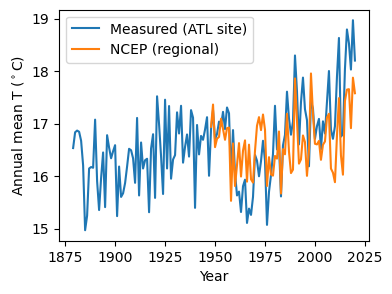

In [9]:
fig=plt.figure(figsize=(4, 3)) # define figure size, unit: inches
ax=fig.add_subplot()
plt.plot(year,TMP_ATL_year_degC,label='Measured (ATL site)') 
plt.plot(TMP_ATL_NCEP_year.year,TMP_ATL_NCEP_year,label='NCEP (regional)')
plt.xlabel('Year')
plt.ylabel('Annual mean T ($^\circ$C)')
# add figure legend
plt.legend()
# save figure as .PDF and .PNG
# put save commands before plt.show()
fn='Fig_ATL_temp'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight")
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight")
plt.show()

## Mini project #3: 2-D plot on a map

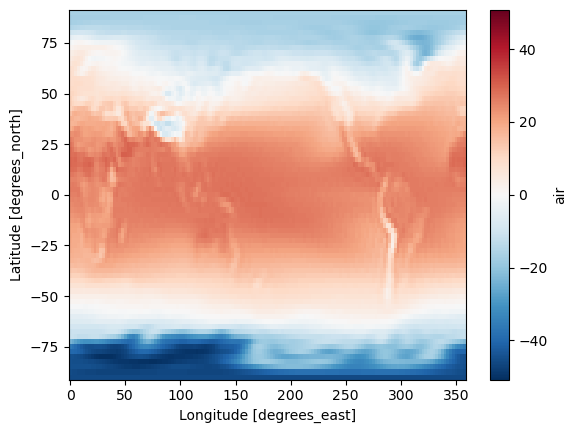

In [10]:
# make a simple plot for climatological mean 
TMP_NCEP_mean=TMP_NCEP.mean(dim='time')
TMP_NCEP_mean.plot()
plt.show()

In [20]:
# X=np.append(TMP_NCEP_mean.lon.values,360)
# Y=np.append(TMP_NCEP_mean.lat.values,-90)
X=TMP_NCEP_mean.lon.values
Y=TMP_NCEP_mean.lat.values
Z=TMP_NCEP_mean.values

# grid boundaries
Xb=np.arange(-2.5/2, 360,2.5)
Yb=np.arange(90-2.5/2, -90,-2.5)
Yb=np.append(90,Yb)
Yb=np.append(Yb,-90)
Yb

NameError: name 'TMP_NCEP_mean' is not defined

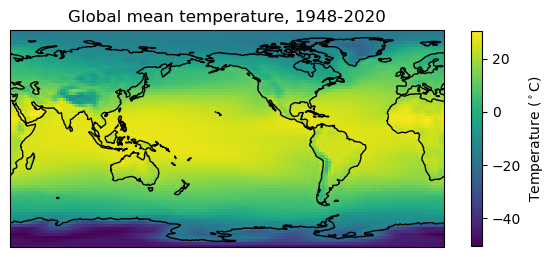

In [74]:
# make it nicer
fig=plt.figure(figsize=(7, 4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-150))
ax.coastlines()
# ax.gridlines(linestyle='--')
cf=plt.pcolormesh(Xb,Yb,Z, transform=ccrs.PlateCarree())
fig.colorbar(cf, ax=ax,shrink=0.7, label='Temperature ($^\circ$C)')
# TMP_NCEP_mean.plot(ax=ax,transform=ccrs.PlateCarree(),
#                    cmap='viridis',vmin=-55,vmax=35,rasterized=True,cbar_kwargs={'shrink': 0.8, 'label': 'Temperature ($^\circ$C)'})
ax.set_title('Global mean temperature, 1948-2020')

fn='Fig_global_mean2'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()

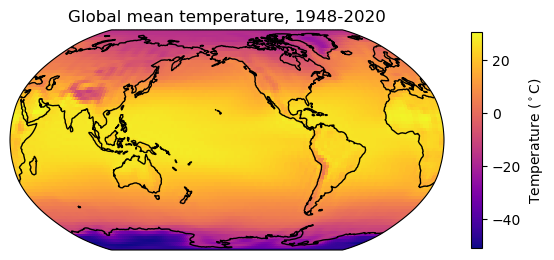

In [84]:
# Let's try other projections
# https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
fig=plt.figure(figsize=(7, 4))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-150))
ax.coastlines()
cf=plt.pcolormesh(Xb,Yb,Z, transform=ccrs.PlateCarree(),cmap='plasma',rasterized=True)
fig.colorbar(cf, ax=ax,shrink=0.7, label='Temperature ($^\circ$C)')

# # ax.gridlines(linestyle='--')
# TMP_NCEP_mean.plot(ax=ax, transform=ccrs.PlateCarree(),
#                    cmap='plasma',rasterized=True,cbar_kwargs={'shrink': 0.8, 'label': 'Temperature ($^\circ$C)'})
ax.set_title('Global mean temperature, 1948-2020')

fn='Fig_global_mean_RobinsonProj'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()


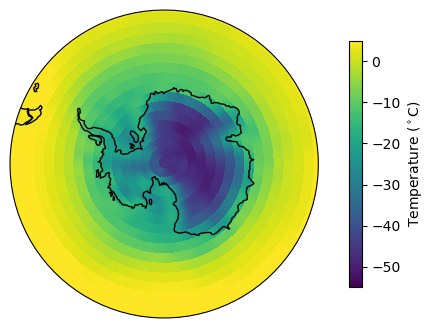

In [83]:
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

cf=plt.pcolormesh(Xb,Yb,Z, transform=ccrs.PlateCarree(),cmap='viridis',vmin=-55,vmax=5,rasterized=True)
fig.colorbar(cf, ax=ax,shrink=0.8, label='Temperature ($^\circ$C)')
# plt.pcolormesh(X,Y,Z, transform=ccrs.PlateCarree(),cmap='plasma',shading='flat')
# # ax.gridlines(linestyle='--')
# TMP_NCEP_mean.plot(ax=ax, transform=ccrs.PlateCarree(),
#                    cmap='plasma',rasterized=True,cbar_kwargs={'shrink': 0.8, 'label': 'Temperature ($^\circ$C)'})
# ax.set_title('Global mean temperature, 1948-2020')

fn='Fig_global_mean_SP'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()

## Mini project # 4: Make a multiple panel plot 

In [22]:
ds=xr.open_dataset('./air.mon.mean.nc')

# extract surface air temperature data for 1948 to 2020
TMP_NCEP1=ds.air.sel(time=slice("1948-01-01","1957-12-01"))
TMP_NCEP2=ds.air.sel(time=slice("2011-01-01","2020-12-01"))

# Select JAN data for every year and average
TMP_NCEP_JAN1=TMP_NCEP1.sel(time=TMP_NCEP1['time.month']==1).mean(dim='time')
TMP_NCEP_JAN2=TMP_NCEP2.sel(time=TMP_NCEP2['time.month']==1).mean(dim='time')

# Select JULY data for every year and average
TMP_NCEP_JUL1=TMP_NCEP1.sel(time=TMP_NCEP1['time.month']==7).mean(dim='time')
TMP_NCEP_JUL2=TMP_NCEP2.sel(time=TMP_NCEP2['time.month']==7).mean(dim='time')


# X=np.append(TMP_NCEP_mean.lon.values,360)
# Y=np.append(TMP_NCEP_mean.lat.values,-90)
X=ds.lon.values
Y=ds.lat.values

# grid boundaries
Xb=np.arange(-2.5/2, 360,2.5)
Yb=np.arange(90-2.5/2, -90,-2.5)
Yb=np.append(90,Yb)
Yb=np.append(Yb,-90)


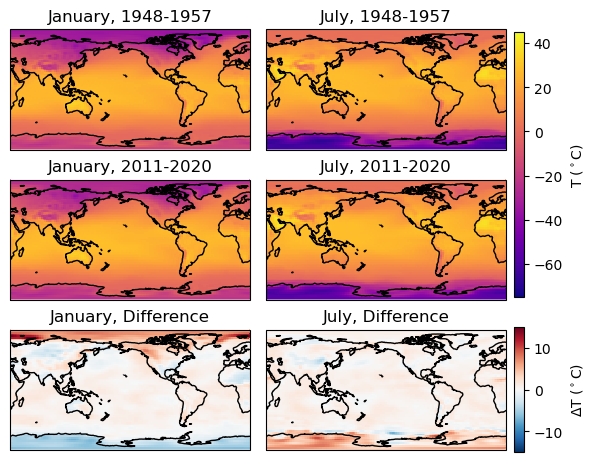

In [83]:
fig=plt.figure(figsize=(8, 5))
####
ax11 = fig.add_axes([0.1, 0.7,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
ax11.coastlines()
cf=plt.pcolormesh(Xb,Yb,TMP_NCEP_JAN1.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax11.set_title('January, 1948-1957')
####
ax21 = fig.add_axes([0.1, 0.4,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
ax21.coastlines()
cf=plt.pcolormesh(Xb,Yb,TMP_NCEP_JAN2.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax21.set_title('January, 2011-2020')
####
ax12 = fig.add_axes([0.42, 0.7,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
ax12.coastlines()
cf=plt.pcolormesh(Xb,Yb,TMP_NCEP_JUL1.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax12.set_title('July, 1948-1957')
###
####
ax22 = fig.add_axes([0.42, 0.4,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
ax22.coastlines()
cf=plt.pcolormesh(Xb,Yb,TMP_NCEP_JUL2.values, transform=ccrs.PlateCarree(),vmin=-75,vmax=45,cmap='plasma',rasterized=True)
ax22.set_title('July, 2011-2020')

ax_cb = fig.add_axes([0.73, 0.41,0.0125,0.53])
fig.colorbar(cf, cax=ax_cb, label='T ($^\circ$C)')

########

delta_TMP_JAN=TMP_NCEP_JAN2-TMP_NCEP_JAN1
delta_TMP_JUL=TMP_NCEP_JUL2-TMP_NCEP_JUL1

####
ax31 = fig.add_axes([0.1, 0.1,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
ax31.coastlines()
cf=plt.pcolormesh(Xb,Yb,delta_TMP_JAN.values, transform=ccrs.PlateCarree(),vmin=-15,vmax=15,cmap='RdBu_r',rasterized=True)
ax31.set_title('January, Difference')

####
ax32 = fig.add_axes([0.42, 0.1,0.3,0.25],projection=ccrs.PlateCarree(central_longitude=-150))
ax32.coastlines()
cf=plt.pcolormesh(Xb,Yb,delta_TMP_JUL.values, transform=ccrs.PlateCarree(),vmin=-15,vmax=15,cmap='RdBu_r',rasterized=True)
ax32.set_title('July, Difference')

ax_cb2 = fig.add_axes([0.73, 0.1,0.0125,0.25])
fig.colorbar(cf, cax=ax_cb2, label='$\Delta$T ($^\circ$C)')


fn='Fig_Jan_July_temp_diff'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)

plt.show()